# Data Cleaning
[www.vexpower.com](www.vexpower.com)

In [2]:
# Set the right folder

import sys
import os
import pandas as pd
import numpy as np
import datetime as dt

if not os.path.isdir("mmm"):
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)

import mmm

### Facebook Ads
Load and clean Facebook Ads data

In [2]:
# Load example Facebook Campaign data
file_name = "Goolybib-Campaigns-Mar-19-2021-Apr-17-2021.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,Reporting Starts,Reporting Ends,Campaign Name,Campaign Delivery,Attribution Setting,Results,Result Indicator,Reach,Frequency,Cost per Results,...,Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),Clicks (All),CTR (All),CPC (All) (USD),Website Purchases,On-Facebook Purchases
0,2021-04-17,2021-04-17,Prospecting - Broad - US,active,7-day click or 1-day view,3,actions:offsite_conversion.fb_pixel_purchase,20103,1.323783,165.582500,...,26612,24.888396,148,4.475203,0.556140,218,0.819179,3.038211,4,NaN
1,2021-04-17,2021-04-17,Prospecting - Broad - Rest of World,active,7-day click or 1-day view,5,actions:offsite_conversion.fb_pixel_purchase,27700,1.232058,83.486000,...,34128,12.231306,150,2.782867,0.439522,263,0.770628,1.587186,2,NaN
2,2021-04-17,2021-04-17,Remarketing - RoW,active,7-day click or 1-day view,8,actions:offsite_conversion.fb_pixel_purchase,13378,1.605322,60.132222,...,21476,25.199758,167,3.240659,0.777612,280,1.303781,1.932821,3,NaN
3,2021-04-17,2021-04-17,Remarketing US,active,7-day click or 1-day view,15,actions:offsite_conversion.fb_pixel_purchase,16205,2.217834,80.990000,...,35940,36.055648,154,8.414545,0.428492,257,0.715081,5.042179,5,NaN
4,2021-04-16,2021-04-16,Prospecting - Broad - US,active,7-day click or 1-day view,3,actions:offsite_conversion.fb_pixel_purchase,19460,1.206937,189.393333,...,23487,24.191255,168,3.382024,0.715289,272,1.158087,2.088897,3,NaN


In [3]:
from mmm.select import get_cols_containing
from mmm.clean import rename_column

spend_col = get_cols_containing(data, 'Amount Spent')[0] # needed because column name contains currency

df = data.copy()
rename_column(df, 'Reporting Starts', 'date')
rename_column(df, spend_col, 'facebook_cost')
rename_column(df, 'Campaign Name', 'campaign_name')

df = df[['date', 'facebook_cost', 'campaign_name']]
df.head()

,date,facebook_cost,campaign_name
0,2021-04-17,662.33,Prospecting - Broad - US
1,2021-04-17,417.43,Prospecting - Broad - Rest of World
2,2021-04-17,541.19,Remarketing - RoW
3,2021-04-17,1295.84,Remarketing US
4,2021-04-16,568.18,Prospecting - Broad - US


In [4]:
from mmm.clean import unstack_data

df = unstack_data(df, metric_column='facebook_cost', unstack_column='campaign_name')

df.head()

,date,Prospecting - Broad - Rest of World | facebook_cost,Prospecting - Broad - US | facebook_cost,Prospecting - Lookalike - US | facebook_cost,Remarketing - RoW | facebook_cost,Remarketing US | facebook_cost
0,2021-03-19,0.00,0.00,827.65,407.48,1445.37
1,2021-03-20,0.00,0.00,0.00,470.21,1526.23
2,2021-03-21,0.00,0.00,813.31,393.15,1413.45
3,2021-03-22,243.30,271.67,746.86,480.06,1437.29
4,2021-03-23,296.28,288.62,0.00,496.98,1443.81


In [5]:
df.to_csv('../data/facebook_clean.csv', index=False)

### Google Ads
Load and clean Google Ads data

In [6]:
# Load example Google Campaign data
file_name = "Day (1).csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,Day,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"March 24, 2021 - April 22, 2021",NaN,NaN,NaN,NaN
1,Day,Campaign,Currency,Impressions,Cost
2,2021-03-24,US // Growth Hacking,USD,2109,72.66
3,2021-03-24,EU // Growth Hacking,USD,29,4.08
4,2021-03-24,EU // Agency Types,USD,177,9.82


In [7]:
data = pd.read_csv('../data/'+file_name, skiprows=2)
data.head()

,Day,Campaign,Currency,Impressions,Cost
0,2021-03-24,US // Growth Hacking,USD,2109,72.66
1,2021-03-24,EU // Growth Hacking,USD,29,4.08
2,2021-03-24,EU // Agency Types,USD,177,9.82
3,2021-03-24,UK-only // Growth Hacking,USD,236,4.22
4,2021-03-25,US // Growth Hacking,USD,1379,44.98


In [8]:
from mmm.clean import rename_column

df = data.copy()
rename_column(df, 'Day', 'date')
rename_column(df, 'Cost', 'google_cost')
rename_column(df, 'Campaign', 'campaign_name')

df = df[['date', 'google_cost', 'campaign_name']]
df.head()

,date,google_cost,campaign_name
0,2021-03-24,72.66,US // Growth Hacking
1,2021-03-24,4.08,EU // Growth Hacking
2,2021-03-24,9.82,EU // Agency Types
3,2021-03-24,4.22,UK-only // Growth Hacking
4,2021-03-25,44.98,US // Growth Hacking


In [9]:
from mmm.clean import unstack_data

df = unstack_data(df, metric_column='google_cost', unstack_column='campaign_name')

df.head()

,date,EU // Agency Types | google_cost,EU // Growth Hacking | google_cost,UK-only // Growth Hacking | google_cost,US // Agency Review Sites | google_cost,US // Agency Types | google_cost,US // Growth Hacking | google_cost
0,2021-03-24,9.82,4.08,4.22,0.47,106.99,72.66
1,2021-03-25,128.75,8.19,24.14,22.05,54.32,44.98
2,2021-03-26,100.24,0.00,0.00,22.65,30.01,0.00
3,2021-03-27,0.00,0.00,0.00,61.29,24.52,0.00
4,2021-03-28,0.00,0.00,0.00,17.85,1.64,0.00


In [10]:
df.to_csv('../data/google_clean.csv', index=False)

### Google Analytics
Load and clean Google Analytics data

In [11]:
# Load example Google Analytics data
file_name = "GoolyBib-trafficsources-all-traffic.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,# www.goolybib.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# All Traffic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 20200426-20201022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# ----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.vexpower.com


In [12]:
data = pd.read_csv('../data/'+file_name, skiprows=6)
data.head()

,Date,Source/Medium,Revenue,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,4/26/2020,affiliate / cpa,14207.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2020,affiliate / cpa,12761.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/28/2020,affiliate / cpa,12474.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/29/2020,affiliate / cpa,12963.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4/30/2020,affiliate / cpa,10441.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
from mmm.clean import rename_column

df = data.copy()
rename_column(df, 'Date', 'date')
rename_column(df, 'Source/Medium', 'source_medium')
rename_column(df, 'Revenue', 'revenue')

df = df[['date', 'revenue', 'source_medium']]
df.head()

,date,revenue,source_medium
0,4/26/2020,14207.75,affiliate / cpa
1,4/27/2020,12761.39,affiliate / cpa
2,4/28/2020,12474.80,affiliate / cpa
3,4/29/2020,12963.09,affiliate / cpa
4,4/30/2020,10441.81,affiliate / cpa


In [14]:
from mmm.clean import unstack_data

df = unstack_data(df, metric_column='revenue', unstack_column='source_medium')

df.head()

,date,(direct) / (none) | revenue,Total | revenue,affiliate / cpa | revenue,facebook / cpc | revenue,google / organic | revenue
0,10/1/2020,8261.61,52204.63,18442.77,7097.64,18402.62
1,10/10/2020,9407.63,46478.29,9342.80,5345.78,22382.09
2,10/11/2020,9151.77,46662.74,11730.68,11560.73,14219.56
3,10/12/2020,5147.25,35314.09,12423.72,8635.74,9107.38
4,10/13/2020,9063.16,48453.03,13360.96,11380.80,14648.11


In [15]:
df.to_csv('../data/revenue_clean.csv', index=False)

### TV Data
Transpose and interpolate TV data

In [50]:
# Load example TV data
file_name = "TV Vexpower - Sheet1.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,Week Number,Week 35,Week 36,Week 37,Week 38,Week 39,Week 40,Week 41,Week 42,Week 43,Grand Total,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Smart Bib,"40,000.00","70,000.00","50,000.00","60,000.00","70,000.00","50,000.00","60,000.00","60,000.00","40,000.00","500,000.00",NaN,NaN,NaN,NaN,NaN
1,Total,"40,000.00","70,000.00","50,000.00","60,000.00","70,000.00","50,000.00","60,000.00","60,000.00","40,000.00","500,000.00",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.vexpower.com


In [51]:
# Clean data
df = data.copy()
df.dropna(thresh=2, inplace=True) # drop NaN rows
df.dropna(thresh=2, axis=1, inplace=True) # drop NaN cols
df.head()

,Week Number,Week 35,Week 36,Week 37,Week 38,Week 39,Week 40,Week 41,Week 42,Week 43,Grand Total
0,Smart Bib,"40,000.00","70,000.00","50,000.00","60,000.00","70,000.00","50,000.00","60,000.00","60,000.00","40,000.00","500,000.00"
1,Total,"40,000.00","70,000.00","50,000.00","60,000.00","70,000.00","50,000.00","60,000.00","60,000.00","40,000.00","500,000.00"


In [52]:
from mmm.clean import transpose_data

# Transpose data

df = transpose_data(df)
df.drop(columns=['Total'], inplace=True)
df.head()

,Week Number,Smart Bib
0,Week 35,"40,000.00"
1,Week 36,"70,000.00"
2,Week 37,"50,000.00"
3,Week 38,"60,000.00"
4,Week 39,"70,000.00"


In [27]:
df.to_csv('../data/tv_clean.csv', index=False)

In [53]:
# the first column needs to be week number
# we also need the column in yyyy-ww format

date_col = df.columns[0]
df[date_col] = df[date_col].apply(lambda x: f"2020-{x.split()[-1]}") # year-weeknum
df.head()

,Week Number,Smart Bib
0,2020-35,"40,000.00"
1,2020-36,"70,000.00"
2,2020-37,"50,000.00"
3,2020-38,"60,000.00"
4,2020-39,"70,000.00"


In [54]:
df.tail()

,Week Number,Smart Bib
5,2020-40,"50,000.00"
6,2020-41,"60,000.00"
7,2020-42,"60,000.00"
8,2020-43,"40,000.00"
9,2020-Total,"500,000.00"


In [55]:
df = df[:-1] # cut off total at bottom
df.tail()

,Week Number,Smart Bib
4,2020-39,"70,000.00"
5,2020-40,"50,000.00"
6,2020-41,"60,000.00"
7,2020-42,"60,000.00"
8,2020-43,"40,000.00"


In [79]:
from mmm.clean import interpolate_weekly_data

# Interpolate the weekly data to daily

df = old_df.copy()
df = interpolate_weekly_data(df)
df.head()

,date,Smart Bib
0,2020-08-31,5714.285714
1,2020-09-01,6326.530612
2,2020-09-02,6938.775510
3,2020-09-03,7551.020408
4,2020-09-04,8163.265306


In [80]:
df.to_csv('../data/tv_clean_daily.csv', index=False)

### Search Trends Data
Load and clean search trends data
[https://trends.google.com/trends/](https://trends.google.com/trends/)

In [81]:
# Load example search trends data
file_name = "multiTimeline.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Week,chess: (United States)
2,2020-03-15,32
3,2020-03-22,42
4,2020-03-29,40


In [83]:
data = pd.read_csv('../data/'+file_name, skiprows=2)
data.head()

,Week,chess: (United States)
0,2020-03-15,32
1,2020-03-22,42
2,2020-03-29,40
3,2020-04-05,39
4,2020-04-12,40


In [96]:
from mmm.clean import handle_search_trends_data

# Clean data
df = data.copy()
    
df = handle_search_trends_data(df)

df.head()

,date,chess: (United States)
0,2020-03-15,32.0
1,2020-03-16,33.4
2,2020-03-17,34.9
3,2020-03-18,36.3
4,2020-03-19,37.7


In [97]:
df.to_csv('../data/search_trends_clean.csv', index=False)

### COVID Mobility Data
Load and clean COVID mobility data
[https://www.google.com/covid19/mobility/](https://www.google.com/covid19/mobility/)

In [3]:
# Load example COVID mobility data
file_name = "2020_US_Region_Mobility_Report.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [4]:
data.shape

(812065, 15)

In [5]:
data.sample(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
611723,US,United States,South Carolina,Lexington County,NaN,NaN,45063.0,ChIJsXt2IvW_-IgRKxYj9Ycjs-w,2020-07-19,-14.0,-1.0,NaN,22.0,-17.0,4.0
766812,US,United States,Washington,Lincoln County,NaN,NaN,53043.0,ChIJ1bH-mg1gnlQRvC95C0AFE2k,2020-06-18,NaN,NaN,NaN,NaN,-24.0,NaN
123183,US,United States,Georgia,Grady County,NaN,NaN,13131.0,ChIJB_xC95io7YgRBFvsMlKozng,2020-09-29,NaN,NaN,NaN,NaN,-20.0,5.0
468429,US,United States,New York,Chautauqua County,NaN,NaN,36013.0,ChIJR4rNe8e10okRD5lYqn0jEmY,2020-10-12,-6.0,4.0,NaN,NaN,-37.0,8.0
188427,US,United States,Indiana,Bartholomew County,NaN,NaN,18005.0,ChIJi3hKRYmBbIgRjFdTSWzskJY,2020-09-05,-3.0,NaN,NaN,NaN,NaN,-3.0
420534,US,United States,Montana,NaN,NaN,US-MT,NaN,ChIJ04p7LZwrQVMRGGwqz1jWcfU,2020-08-21,3.0,21.0,NaN,26.0,-26.0,3.0
7523,US,United States,Alabama,Dallas County,NaN,NaN,1047.0,ChIJ9xTUS0kIj4gR5H8RrvN7U5A,2020-10-02,-8.0,-8.0,NaN,NaN,-19.0,2.0
74738,US,United States,Colorado,Logan County,NaN,NaN,8075.0,ChIJKw6ag78ncocRTKB7AP51HbQ,2020-12-07,-15.0,NaN,NaN,NaN,-15.0,4.0
105257,US,United States,Florida,Washington County,NaN,NaN,12133.0,ChIJVcKAT5q8k4gRGjo4syS8Z_M,2020-07-13,-10.0,1.0,NaN,NaN,-19.0,NaN
654323,US,United States,Texas,Bandera County,NaN,NaN,48019.0,ChIJ3dcmJQ-pXoYR9Tfjv4TPPnA,2020-11-01,NaN,NaN,NaN,NaN,-16.0,NaN


In [6]:
region = "Texas"
texas = data[data['sub_region_1'] == region]
texas.shape

(59924, 15)

In [7]:
texas.sample(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
706299,US,United States,Texas,Walker County,NaN,NaN,48471.0,ChIJ4dJ_NUYhR4YRLpSNSyrfkOg,2020-08-16,11.0,12.0,34.0,24.0,-22.0,NaN
663451,US,United States,Texas,Cooke County,NaN,NaN,48097.0,ChIJNx0mIcKmTYYRxV-8JFisk-c,2020-04-15,-7.0,NaN,NaN,NaN,-37.0,15.0
671743,US,United States,Texas,Goliad County,NaN,NaN,48175.0,ChIJ8RZPkcyiQoYR4TdkBWH5Nms,2020-08-07,NaN,NaN,NaN,NaN,-31.0,NaN
671276,US,United States,Texas,Garza County,NaN,NaN,48169.0,ChIJ_fahg8FV_oYRCo_7MaUlLBE,2020-02-23,NaN,0.0,NaN,NaN,NaN,NaN
675309,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-12-17,-13.0,-5.0,-24.0,-35.0,-32.0,10.0
651864,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-04-07,-26.0,-6.0,NaN,NaN,-33.0,11.0
657766,US,United States,Texas,Brown County,NaN,NaN,48049.0,ChIJFeU3xonGUIYRWKlWLrGcjT0,2020-06-03,15.0,12.0,NaN,NaN,-21.0,4.0
679747,US,United States,Texas,Jasper County,NaN,NaN,48241.0,ChIJSZO1ZNAMOYYRhJ183BoAR8s,2020-05-13,6.0,0.0,NaN,NaN,-18.0,7.0
658792,US,United States,Texas,Caldwell County,NaN,NaN,48055.0,ChIJ-zyRzgNRQ4YRh6l-eDM-Wkw,2020-09-17,-5.0,5.0,NaN,-3.0,-30.0,8.0
698533,US,United States,Texas,Rusk County,NaN,NaN,48401.0,ChIJt3UNXM_PN4YRHSVPMOzqsbA,2020-05-10,6.0,22.0,NaN,NaN,-9.0,NaN


In [8]:
texas.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
651491,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-02-15,3.0,3.0,12.0,3.0,1.0,-1.0
651492,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-02-16,8.0,3.0,20.0,4.0,1.0,-1.0
651493,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-02-17,6.0,2.0,21.0,2.0,-18.0,4.0
651494,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-02-18,-1.0,-1.0,-4.0,3.0,1.0,0.0
651495,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-02-19,-2.0,0.0,-12.0,0.0,3.0,1.0


In [9]:
texas = texas[texas['sub_region_2'].isnull()]
texas.shape

(321, 15)

In [10]:
texas.sample(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
651763,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-11-13,-17.0,-8.0,-12.0,-26.0,-29.0,9.0
651642,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-07-15,-15.0,-3.0,7.0,-28.0,-40.0,14.0
651770,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-11-20,-17.0,-8.0,-13.0,-24.0,-29.0,9.0
651680,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-08-22,-20.0,-6.0,1.0,-22.0,-16.0,5.0
651586,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-05-20,-14.0,-1.0,15.0,-30.0,-38.0,14.0
651503,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-02-27,11.0,6.0,25.0,7.0,2.0,-2.0
651620,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-06-23,-15.0,-6.0,0.0,-28.0,-40.0,14.0
651720,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-10-01,-12.0,-6.0,11.0,-23.0,-31.0,8.0
651570,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-05-04,-23.0,-8.0,-5.0,-36.0,-41.0,16.0
651760,US,United States,Texas,NaN,NaN,US-TX,NaN,ChIJSTKCCzZwQIYRPN4IGI8c6xY,2020-11-10,-17.0,-10.0,-12.0,-28.0,-31.0,10.0


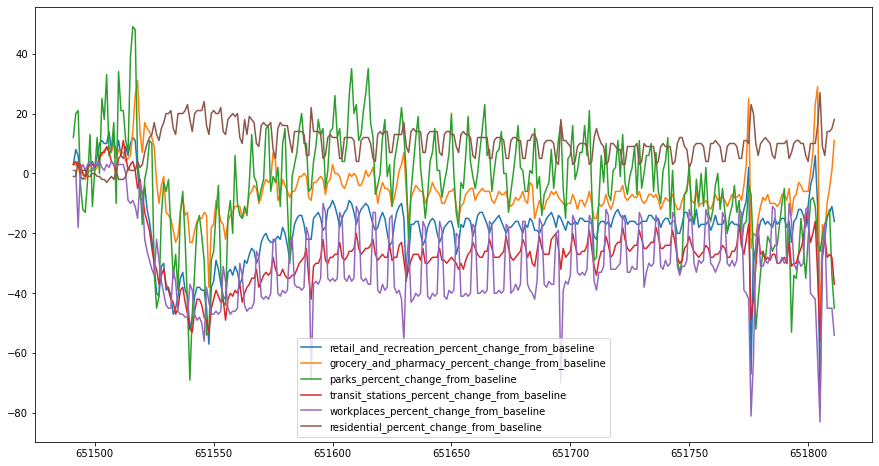

In [11]:
texas[texas.columns[8:]].plot(figsize=(15,8));

In [12]:
from mmm.clean import handle_covid_data

df = handle_covid_data(data, sub_region_1="Florida")

print(df.shape)
df.head()

(321, 7)


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,2.0,0.0,9.0,2.0,-1.0,-1.0
1,2020-02-16,4.0,1.0,8.0,2.0,-2.0,0.0
2,2020-02-17,5.0,1.0,24.0,0.0,-19.0,4.0
3,2020-02-18,3.0,2.0,13.0,6.0,1.0,0.0
4,2020-02-19,3.0,0.0,15.0,5.0,2.0,0.0


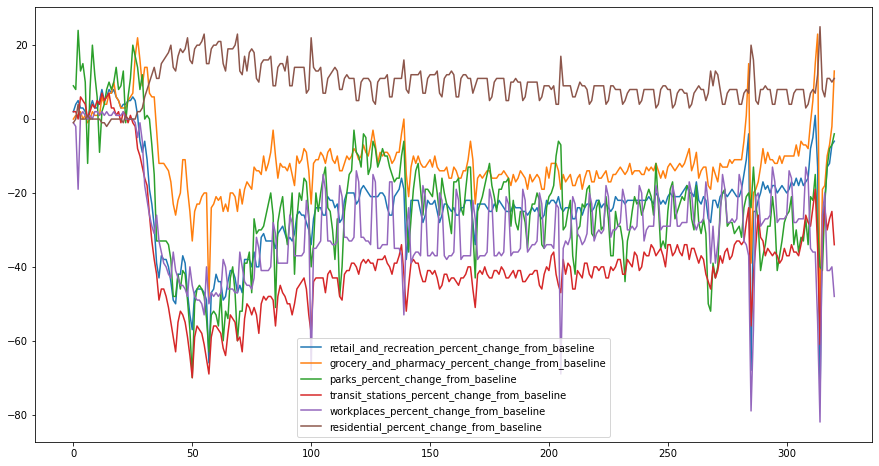

In [13]:
df.plot(figsize=(15,8));

In [14]:
# Load and append 2021 data
file_name = "2021_US_Region_Mobility_Report.csv"
data2 = pd.read_csv('../data/'+file_name)
data2.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-01,-47.0,-37.0,-21.0,-62.0,-75.0,27.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-02,-26.0,-13.0,-14.0,-33.0,-21.0,9.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-03,-27.0,-16.0,-24.0,-33.0,-17.0,7.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-04,-19.0,-8.0,-23.0,-39.0,-34.0,12.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-05,-20.0,-6.0,-20.0,-39.0,-34.0,12.0


In [15]:
data2.shape

(390369, 15)

In [18]:
df2 = handle_covid_data(data2, sub_region_1="Florida")
df2.shape

(150, 7)

In [19]:
df2.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,-37.0,-33.0,-2.0,-52.0,-72.0,22.0
1,2021-01-02,-22.0,-15.0,-21.0,-28.0,-23.0,7.0
2,2021-01-03,-21.0,-16.0,-32.0,-25.0,-19.0,6.0
3,2021-01-04,-16.0,-9.0,-30.0,-30.0,-30.0,8.0
4,2021-01-05,-17.0,-8.0,-29.0,-32.0,-29.0,9.0


In [21]:
merged = df.append(df2)
print(merged.shape)
merged.sample(10)

(471, 7)


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
90,2020-05-15,-33.0,-14.0,-34.0,-50.0,-39.0,17.0
134,2020-06-28,-26.0,-12.0,-15.0,-42.0,-17.0,6.0
39,2021-02-09,-20.0,-12.0,-23.0,-35.0,-27.0,8.0
89,2020-05-14,-31.0,-13.0,-29.0,-48.0,-39.0,13.0
40,2021-02-10,-18.0,-12.0,-16.0,-35.0,-26.0,8.0
73,2020-04-28,-38.0,-17.0,-39.0,-50.0,-45.0,13.0
76,2021-03-18,-7.0,-5.0,-7.0,-21.0,-32.0,7.0
11,2020-02-26,5.0,1.0,-9.0,4.0,1.0,0.0
57,2020-04-12,-66.0,-49.0,-63.0,-69.0,-50.0,15.0
1,2020-02-16,4.0,1.0,8.0,2.0,-2.0,0.0


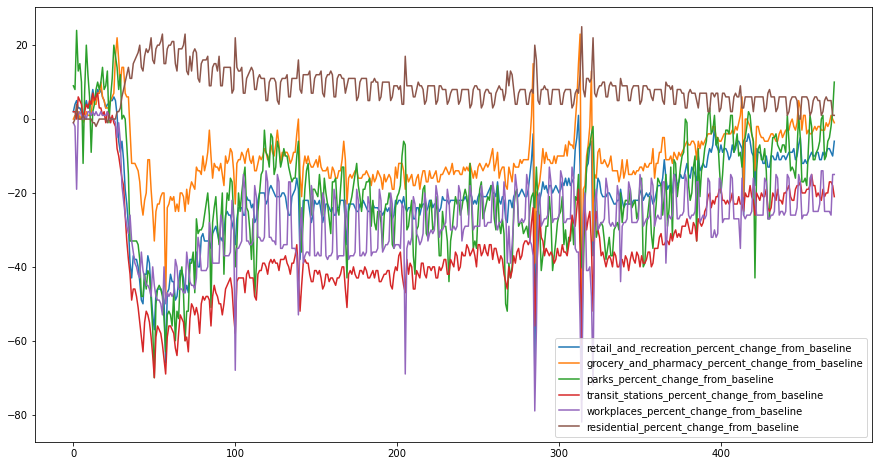

In [28]:
merged.reset_index(inplace=True, drop=True)
merged.plot(figsize=(15,8));

In [29]:
df.to_csv('../data/covid_mobility_clean.csv', index=False)

### Weather Data
Load and clean weather data
[https://power.larc.nasa.gov/data-access-viewer/](https://power.larc.nasa.gov/data-access-viewer/)

In [30]:
# Load weather data
file_name = "POWER_SinglePoint_Daily_20200426_20201022_040d74N_74d40W_8aaec005.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,-BEGIN HEADER-,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dates (month/day/year): 04/26/2020 through 10/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Location: Latitude 40.7412 Longitude -74.0398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Elevation from MERRA-2: Average for 1/2x1/2 de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Climate zone: na (reference Briggs et al: http...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data = pd.read_csv('../data/'+file_name, skiprows=16)
data.head()

,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,40.74121,-74.03979,2020,4,26,4.05,7.35,6.25,6.26,8.59,4.54,7.29
1,40.74121,-74.03979,2020,4,27,6.91,6.58,3.47,3.48,10.07,3.16,6.24
2,40.74121,-74.03979,2020,4,28,14.64,9.28,4.28,4.09,16.40,1.76,9.38
3,40.74121,-74.03979,2020,4,29,7.75,8.95,7.13,7.15,12.98,5.23,9.35
4,40.74121,-74.03979,2020,4,30,5.44,12.32,11.55,11.54,14.98,9.53,12.53


In [48]:
from mmm.clean import handle_weather_data

df = data.copy()

df = handle_weather_data(df)

df.sample(10)

,date,T2M_RANGE,T2M_MAX,T2M_MIN,T2M
26,2020-05-22,13.36,21.85,8.49,15.69
40,2020-06-05,6.70,24.84,18.14,21.35
66,2020-07-01,8.91,27.58,18.67,23.05
53,2020-06-18,10.20,25.35,15.15,20.38
154,2020-09-27,10.64,26.98,16.34,21.27
17,2020-05-13,13.78,15.03,1.25,8.39
127,2020-08-31,8.93,23.94,15.01,19.44
133,2020-09-06,14.02,27.58,13.55,20.85
9,2020-05-05,10.44,14.84,4.40,9.41
120,2020-08-24,11.01,31.68,20.67,25.99


In [49]:
df.to_csv('../data/weather_clean.csv', index=False)

### Holidays Data
Load holidays and create dummies

In [3]:
# Load holidays data
file_name = "Holidays - Sheet1.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,date,holiday
0,1995-01-01,New Year's Day
1,1995-01-02,New Year's Day (Observed)
2,1995-01-16,"Martin Luther King, Jr. Day"
3,1995-02-20,Washington's Birthday
4,1995-05-29,Memorial Day


In [4]:
from mmm.clean import create_holiday_dummies

df = data.copy()

df = create_holiday_dummies(df)

df.tail()

,date,New Year's Day,New Year's Day (Observed),"Martin Luther King, Jr. Day",Washington's Birthday,Memorial Day,Independence Day,Labor Day,Columbus Day,Veterans Day (Observed),Veterans Day,Thanksgiving,Christmas Day,Independence Day (Observed),Christmas Day (Observed)
18253,2044-12-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18254,2044-12-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18255,2044-12-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18256,2044-12-25,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18257,2044-12-26,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df.to_csv('../data/holidays_clean.csv', index=False)

### Date Ranges (Zodiac)
Add dummy variables for important date ranges
(this was from a April Fools campaign, but can be used for any date ranges)

In [6]:
# Load star signs (or other important date ranges)
file_name = "star-signs - Sheet1.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,start,end,name
0,2020-03-21,2020-04-19,Aries
1,2020-04-20,2020-05-20,Taurus
2,2020-05-21,2020-06-21,Gemini
3,2020-06-22,2020-07-22,Cancer
4,2020-07-23,2020-08-22,Leo


In [7]:
from mmm.clean import create_date_range_dummies

df = data.copy()

df = create_date_range_dummies(df)

df.head()

,date,Aries,Taurus,Gemini,Cancer,Leo,Virgo,Libra,Scorpius,Sagittarius,Capricorn,Aquarius,Pisces
0,2020-03-21,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-22,1,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-23,1,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-24,1,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-25,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.to_csv('../data/dates_clean.csv', index=False)